# 线性回归: 使用分解(Cholesky方法)
--------------------------------

本脚本使用TensorFlow函数`tf.cholesky()`来分解我们设计的矩阵，并且从线性回归中求解参数矩阵。

对于线性回归，我们给定一个系统（方程）$A \cdot x = y$。这里，$A$是我们的设计矩阵，$x$是我们的参数矩阵(我们感兴趣)，并且$y$是我们的目标矩阵（依赖值）。

对于Cholesky分解，我们假设将矩阵$A$分解为一个下三角矩阵$L$和一个上三角矩阵的乘积$L^{T}$。

注意到$A$是一个方阵。当然，对于超定方程，$A$不是方阵。因此我们参数化乘积$A^{T} \cdot A$。我们假设：

$$A^{T} \cdot A = L^{T} \cdot L$$

更多关于Cholesky分解和它相关只是，可以看这个维基百科：[The Cholesky Decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)

考虑$A$有唯一的Cholesky分解，我们可以写我们自己的线性回归方程，如下所示：

$$ L^{T} \cdot L \cdot x = A^{T} \cdot y $$

然后将上面的公式改为如下：

$$L^{T} \cdot z = A^{T} \cdot y$$

其中

$$L \cdot x = z$$

以下为求解$x$的具体过程：
 
 1. 计算$A$的Cholesk分解，其中$A^{T} \cdot A = L^{T} \cdot L$。
 
 2. 求解($L^{T} \cdot z = A^{T} \cdot y$)，得到$z$。
 
 3. 最终，求解($L \cdot x = z$)，来得到$x$。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

和前面介绍的内容一样生成数据

In [3]:
# 创建数据
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

我们生成设计矩阵$A$。

In [4]:
# 创建设计矩阵
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

In [5]:
# 创建y矩阵
y = np.transpose(np.matrix(y_vals))

# 从numpy变量创建张量
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

现在我们计算矩阵A的乘积$A^T \cdot A$，并且计算它的Cholesky分解。

In [7]:
# 求Cholesky分解
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

求解第一个方程。（算法的第二步）--这些没有用到TensorFlow的反向求导的优势！

In [8]:
# Solve L*y=t(A)*b
# 求解 L * y = t(A) * b
tA_y = tf.matmul(tf.transpose(A_tensor), y)
sol1 = tf.matrix_solve(L, tA_y)

通过求解第二个方程，来接的参数矩阵（算法第三步）

In [9]:
# Solve L' * y = sol1
# 求解 L' * y = sol1
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

solution_eval = sess.run(sol2)

求解系数，并且得到最匹配曲线。

In [10]:
# 获取系数
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# 得到最优匹配曲线
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 1.0339820962490245
y_intercept: -0.11877148496758502


最后，用Matplotlib画出拟合曲线

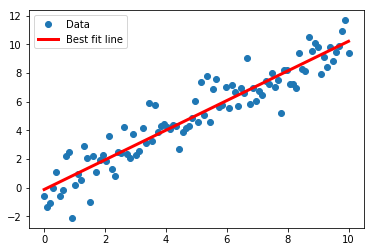

In [11]:
# 画出结果
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()